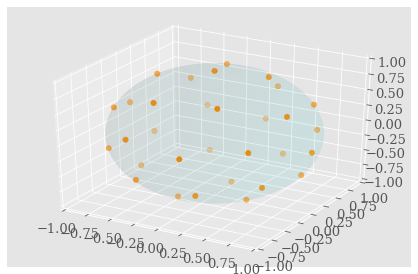

In [3]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13
#plt.rcParams.update({'figure.autolayout': True})
plt.rc('text', usetex=False)
pi = np.pi
sin = np.sin
cos = np.cos
N = 30
#Začetne točke:
theta0 = np.random.uniform(low =0, high = pi, size = N)
fi0 = np.random.uniform(low=0, high=2*pi, size = N)

x0 = np.array([theta0, fi0]).T.reshape(-1) #Točke v obliki (theta1, fi1, theta2, fi2...)
def W(tocke):
    """Izračunaj elektrostatsko energijo,
    točko na severnem polu pridoda pomožna funkcija karteziraj,
    input je oblike (theta1, fi1, theta2, fi2...),
    računanje pa se sprovede v kartezičnih koordinatah."""
    kartarray = karteziraj(tocke)
    N = kartarray.shape[0]
    energija = 0
    for i in range(N):
        for j in range(i):
            x1,y1,z1 = kartarray[i]
            x2,y2,z2 = kartarray[j]
            d = np.sqrt(
            (x1-x2)**2 +
            (y1-y2)**2+
            (z1-z2)**2)
            energija += 1/d
    return energija         
    
def karteziraj(arrej):
    """Sprejme array oblike (theta1, fi1, theta2, fi2...),
    vrne array oblike [[x1,y1,z1],
                       [x2,y2,z2],... ]
    PAZI: Zadnji element arraya je točka na severnem polu, dolžina arraya se poveča za 1."""
    N = arrej.shape[0]//2
    arrej = arrej.reshape(N, -1) #so oblike [[theta1, fi1],[theta2,fi2],...]
    res = np.zeros((N+1, 3))
    for i, item in enumerate(arrej):
        t,f = item
        x = sin(t)*cos(f)
        y = sin(t)*sin(f)
        z = cos(t)
        res[i] = np.array([x,y,z])
    res[-1] = np.array([0,0,1])
    assert res.shape[0] == N+1, "U rezultatu je preveč al pa premal elementov. Mona"
    return res.reshape(-1,3)
Res = minimize(W, x0=x0, method="Nelder-Mead", tol=1e-10)

kartarray = karteziraj(Res.x)

xx = kartarray[:,0]
yy = kartarray[:,1]
zz = kartarray[:,2]
np.mean(karteziraj(Res.x), axis = 0)


#Set colours and render
r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(
    x, y, z,  rstride=1, cstride=1, color='c', alpha=0.05, linewidth=0)

ax.scatter(xx,yy,zz,color="darkorange",s=29)

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
#ax.set_aspect("equal")
plt.tight_layout()
#plt.savefig("{}.pdf".format(N+1))
#plt.savefig("{}.jpg".format(N+1))
plt.show()

In [147]:
np.mean(karteziraj(Res.x), axis = 0)

array([-0.01063827,  0.00966081,  0.04607171])

In [148]:
Res.fun

56.684062515432736

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

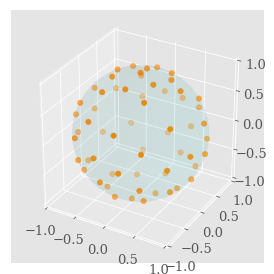

In [149]:
for N in [13,19,39,59]:
    plt.clf()
    #Začetne točke:
    theta0 = np.random.uniform(low =0, high = pi, size = N)
    fi0 = np.random.uniform(low=0, high=2*pi, size = N)

    x0 = np.array([theta0, fi0]).T.reshape(-1) #Točke v obliki (theta1, fi1, theta2, fi2...)
    def W(tocke):
        """Izračunaj elektrostatsko energijo,
        točko na severnem polu pridoda pomožna funkcija karteziraj,
        input je oblike (theta1, fi1, theta2, fi2...),
        računanje pa se sprovede v kartezičnih koordinatah."""
        kartarray = karteziraj(tocke)
        N = kartarray.shape[0]
        energija = 0
        for i in range(N):
            for j in range(i):
                x1,y1,z1 = kartarray[i]
                x2,y2,z2 = kartarray[j]
                d = np.sqrt(
                (x1-x2)**2 +
                (y1-y2)**2+
                (z1-z2)**2)
                energija += 1/d
        return energija         

    def karteziraj(arrej):
        """Sprejme array oblike (theta1, fi1, theta2, fi2...),
        vrne array oblike [[x1,y1,z1],
                           [x2,y2,z2],... ]
        PAZI: Zadnji element arraya je točka na severnem polu, dolžina arraya se poveča za 1."""
        N = arrej.shape[0]//2
        arrej = arrej.reshape(N, -1) #so oblike [[theta1, fi1],[theta2,fi2],...]
        res = np.zeros((N+1, 3))
        for i, item in enumerate(arrej):
            t,f = item
            x = sin(t)*cos(f)
            y = sin(t)*sin(f)
            z = cos(t)
            res[i] = np.array([x,y,z])
        res[-1] = np.array([0,0,1])
        assert res.shape[0] == N+1, "U rezultatu je preveč al pa premal elementov. Mona"
        return res.reshape(-1,3)
    Res = minimize(W, x0=x0, method="Nelder-Mead", tol=1e-10)

    kartarray = karteziraj(Res.x)

    xx = kartarray[:,0]
    yy = kartarray[:,1]
    zz = kartarray[:,2]
    np.mean(karteziraj(Res.x), axis = 0)


    #Set colours and render
    r = 1
    pi = np.pi
    cos = np.cos
    sin = np.sin
    phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
    x = r*sin(phi)*cos(theta)
    y = r*sin(phi)*sin(theta)
    z = r*cos(phi)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(
        x, y, z,  rstride=1, cstride=1, color='c', alpha=0.05, linewidth=0)

    ax.scatter(xx,yy,zz,color="darkorange",s=29)

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    #ax.set_aspect("equal")
    plt.tight_layout()
    #plt.savefig("{}.pdf".format(N+1))
    #plt.savefig("{}.jpg".format(N+1))
    plt.show()

In [166]:
def podatki(N):
    theta0 = np.random.uniform(low =0, high = pi, size = N)
    fi0 = np.random.uniform(low=0, high=2*pi, size = N)

    x0 = np.array([theta0, fi0]).T.reshape(-1) #Točke v obliki (theta1, fi1, theta2, fi2...)
    def W(tocke):
        """Izračunaj elektrostatsko energijo,
        točko na severnem polu pridoda pomožna funkcija karteziraj,
        input je oblike (theta1, fi1, theta2, fi2...),
        računanje pa se sprovede v kartezičnih koordinatah."""
        kartarray = karteziraj(tocke)
        N = kartarray.shape[0]
        energija = 0
        for i in range(N):
            for j in range(i):
                x1,y1,z1 = kartarray[i]
                x2,y2,z2 = kartarray[j]
                d = np.sqrt(
                (x1-x2)**2 +
                (y1-y2)**2+
                (z1-z2)**2)
                energija += 1/d
        return energija         

    def karteziraj(arrej):
        """Sprejme array oblike (theta1, fi1, theta2, fi2...),
        vrne array oblike [[x1,y1,z1],
                           [x2,y2,z2],... ]
        PAZI: Zadnji element arraya je točka na severnem polu, dolžina arraya se poveča za 1."""
        N = arrej.shape[0]//2
        arrej = arrej.reshape(N, -1) #so oblike [[theta1, fi1],[theta2,fi2],...]
        res = np.zeros((N+1, 3))
        for i, item in enumerate(arrej):
            t,f = item
            x = sin(t)*cos(f)
            y = sin(t)*sin(f)
            z = cos(t)
            res[i] = np.array([x,y,z])
        res[-1] = np.array([0,0,1])
        assert res.shape[0] == N+1, "U rezultatu je preveč al pa premal elementov. Mona"
        return res.reshape(-1,3)
    Res = minimize(W, x0=x0, method="Nelder-Mead", tol=1e-10)
    print("Vseh točk: {}, energija: {}".format(N+1, Res.fun))
    return Res.fun


In [197]:
%%time
podatki(24)

Vseh točk: 25, energija: 247.70450311812675
CPU times: user 53 s, sys: 1.03 s, total: 54 s
Wall time: 58.8 s


247.70450311812675

In [198]:
%time podatki(25)

Vseh točk: 26, energija: 265.3684966274009
CPU times: user 59.2 s, sys: 943 ms, total: 1min
Wall time: 1min 6s


265.3684966274009

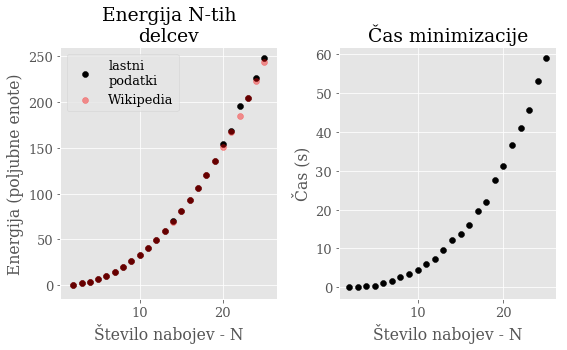

In [244]:
df = pd.DataFrame(data={
    "E":np.array([0.5,1.73205,3.67423,6.47469,9.9853,
                  14.45527,19.6755,25.76086,32.716959,
                  40.60695,49.175,58.853,70.113,80.72,92.96,
                  106.11,120.289,135.257,154.49,168.72,195.36,204.82,226.34,247.7]),
    "T" : np.array([0.0271,0.0783,0.253,0.478,1.02,1.71,
                  2.68,3.5,4.53,6.14,7.28,9.49,12.1,13.8,16.1,
                  19.5,22,27.5,31.1 ,36.5,40.9,45.5,53.1,58.8]),
    "Wiki": np.array([.5,1.73205,3.67423,6.474,9.985,14.4529,
                      19.6753,25.75998,32.7169,40.596,49.165,58.853,
                      69.3,80.67,92.911,106.05,120.08,135.089,150.88,
                      167.67,185.2875,203.93,223.34,243.8127])
}, index=np.arange(start=2, stop= 26, step=1))
plt.figure(figsize=(8,5))
plt.subplot(121)
plt.scatter(df.index, df.E, c="k", label="lastni\npodatki")
plt.scatter(df.index, df.Wiki, c="r", label="Wikipedia", alpha=0.4)
plt.title("Energija N-tih\ndelcev")
plt.legend()
plt.xlabel("Število nabojev - N")
plt.ylabel("Energija (poljubne enote)")

plt.subplot(122)
plt.scatter(df.index, df["T"], c="k")
plt.title("Čas minimizacije")
plt.ylabel("Čas (s)")
plt.xlabel("Število nabojev - N")

plt.tight_layout(pad=0.9)

plt.savefig("energijacas1.pdf")
plt.show()

In [229]:
df

,E,T
2,0.500000,0.0271
3,1.732050,0.0783
4,3.674230,0.2530
5,6.474690,0.4780
6,9.985300,1.0200
7,14.455270,1.7100
8,19.675500,2.6800
9,25.760860,3.5000
10,32.716959,4.5300
11,40.606950,6.1400


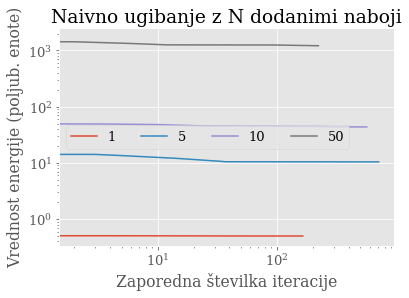

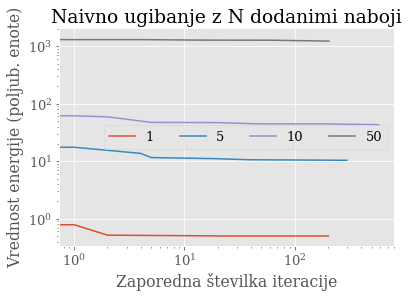

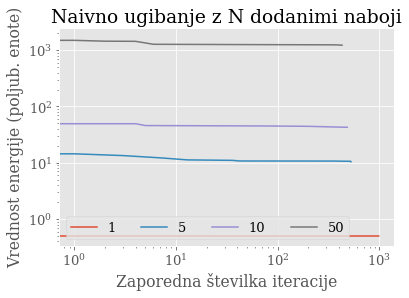

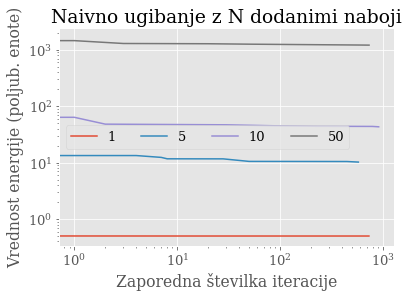

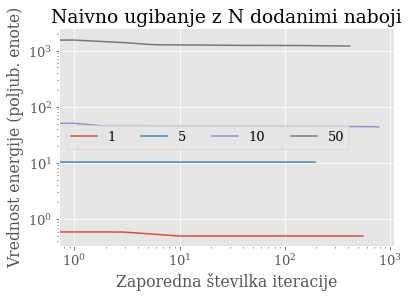

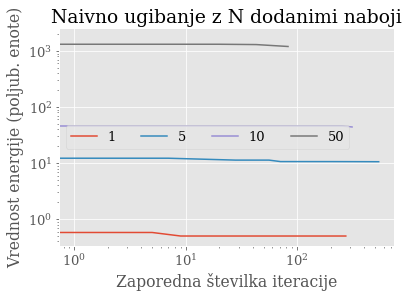

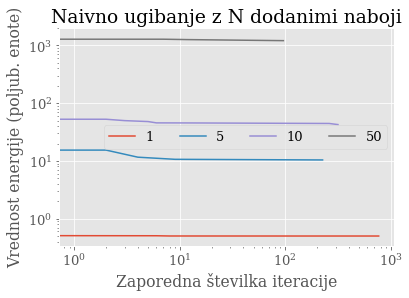

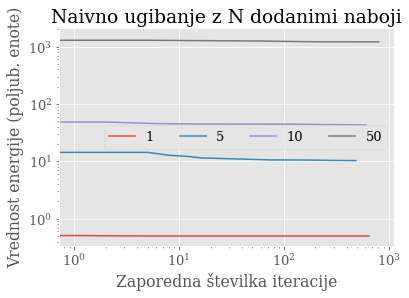

26.2 s ± 1.07 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [121]:
%%timeit
naivno = dict()
I = 1000
prazno  = np.full(I, fill_value=np.nan)
df = pd.DataFrame(index=np.arange(0, I, 1), data = {1:prazno, 5:prazno,10:prazno,50:prazno
                                                    #,5:prazno,6:prazno,7:prazno
                                                   })
for N in [1,5,10,50]:
    w_min = np.inf
    potek = dict()
    for i in range(1000):        
        theta0 = np.random.uniform(low =0, high = pi, size = N)
        fi0 = np.random.uniform(low=0, high=2*pi, size = N)
        x0 = np.array([theta0, fi0]).T.reshape(-1) #Točke v obliki (theta1, fi1, theta2, fi2...)
        rezultat = W(x0)
        if rezultat < w_min:
            potek[i] = rezultat
            #print(N, i, rezultat, sep=" : ")
            w_min = rezultat
            df[N][i]=rezultat
        else:
            pass
    naivno[N] = potek
for col in df.columns:
    plt.plot(df[col].dropna(), label=col)
#plt.semilogy()
plt.legend(ncol=4)
plt.semilogy()
plt.semilogx()
plt.title("Naivno ugibanje z N dodanimi naboji")
plt.ylabel("Vrednost energije (poljub. enote)")
plt.xlabel("Zaporedna številka iteracije")

plt.savefig("naivno2.pdf")
plt.show()


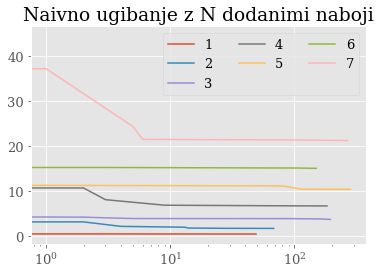

In [86]:
df.columns

Int64Index([1, 2, 3, 4, 5, 6, 7], dtype='int64')

In [88]:
df[1]

0      0.537777
1      0.519203
2           NaN
3      0.500039
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
         ...   
270         NaN
271         NaN
272         NaN
273         NaN
274         NaN
275         NaN
276         NaN
277         NaN
278         NaN
279         NaN
280         NaN
281         NaN
282         NaN
283         NaN
284         NaN
285         NaN
286         NaN
287         NaN
288         NaN
289         NaN
290         NaN
291         NaN
292         NaN
293         NaN
294         NaN
295         NaN
296         NaN
297         NaN
298         NaN
299         NaN
Name: 1, Length: 300, dt